# Random Sample imputation

Aim : Random sample imputation consist of taking random observation from the dataset and we use this observation to replace the Nan values

* when should it used?
It assumes that data are missing completely at random (MCAT)

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("titanic_train.csv", usecols =['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

### we having 177 null values in age

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

#### here we having 19% of null values in age

In [6]:
df['Age'].isnull().sum()

177

In [7]:
df["Age"].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
def impute_nan(df,variable,median):
    #df[variable+"_median"]=df[variable].fillna(median)
    #df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    # when ever null is found replace with random sample
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [9]:
median = df.Age.median()

In [10]:
median

28.0

In [11]:
impute_nan(df,"Age",median)

In [12]:
df.head(30)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,NaN
1,1,38.0,71.2833,NaN
2,1,26.0,7.9250,NaN
3,1,35.0,53.1000,NaN
4,0,35.0,8.0500,NaN
5,0,NaN,8.4583,28.00
6,0,54.0,51.8625,NaN
7,0,2.0,21.0750,NaN
8,1,27.0,11.1333,NaN
9,1,14.0,30.0708,NaN


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

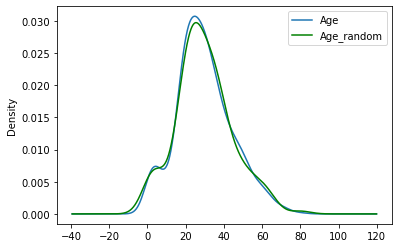

In [15]:


fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df['Age_random'].plot(kind='kde', ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



### capturing nan values with a new feature

* it works well if the data are not missing completely at random

In [16]:
df =pd.read_csv("titanic_train.csv", usecols =['Age','Fare','Survived'])
df.head()
import numpy as np

In [17]:
df['Age_NAN'] =np.where(df['Age'].isnull(),1,0)

In [18]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [73]:
df['Age_NAN']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Age_NAN, Length: 891, dtype: int64

### advantages

1. easy to implement
2. captures the importance of missing values

In [85]:
median_= df.Age.median()

In [86]:
df["Age"].fillna(median_)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [87]:
df.head(30)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
df.Age.hist(bins=150
           )

/home/fastai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

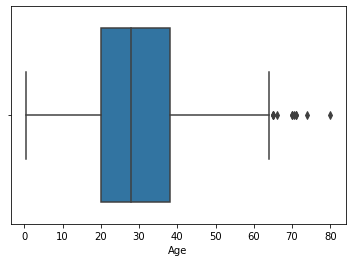

In [103]:


import seaborn as sns

sns.boxplot('Age',data=df)

In [105]:
#here we are takng after 3rd std deviation from means so we use + 3*df.age.std()
extreme=df['Age'].mean()+3*df.Age.std()

In [108]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distrbution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [109]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [112]:
df.head(30)

,Survived,Age,Fare,Age_NAN,Age_end_distrbution
0,0,22.0,7.2500,0,22.00000
1,1,38.0,71.2833,0,38.00000
2,1,26.0,7.9250,0,26.00000
3,1,35.0,53.1000,0,35.00000
4,0,35.0,8.0500,0,35.00000
5,0,28.0,8.4583,1,73.27861
6,0,54.0,51.8625,0,54.00000
7,0,2.0,21.0750,0,2.00000
8,1,27.0,11.1333,0,27.00000
9,1,14.0,30.0708,0,14.00000


<AxesSubplot:>

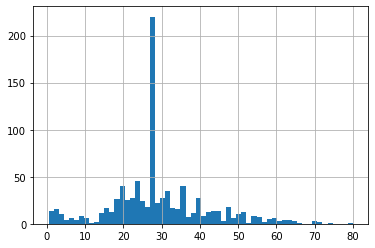

In [111]:
df['Age'].hist(bins=60)

<AxesSubplot:>

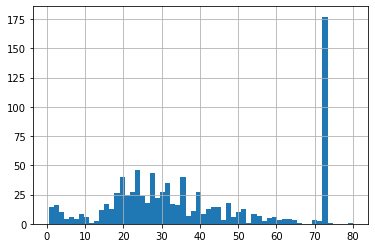

In [113]:
df['Age_end_distrbution'].hist(bins=60)

/home/fastai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distrbution'>

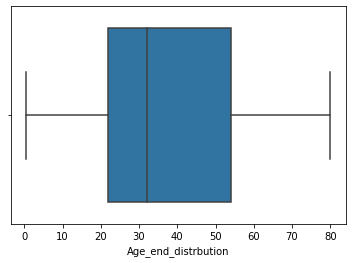

In [114]:
sns.boxplot("Age_end_distrbution",data=df)

#to remove outliers use end distrbutions